In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.cluster import KMeans


In [2]:
class image:
    def __init__(self, img_src):
        self.img = cv2.imread(img_src)
        img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        self.img_arr = img.reshape(img.shape[0] * self.img.shape[1], 3)
        
    def img_show(self):
        plt.imshow(self.img)
        plt.show()

    def get_rbg(self):
        return cv2.split(self.img)

    def kmeans(self, k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(self.img_arr)
        self.centers = kmeans.cluster_centers_
        self.labels = kmeans.labels_
        return self.centers

    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))


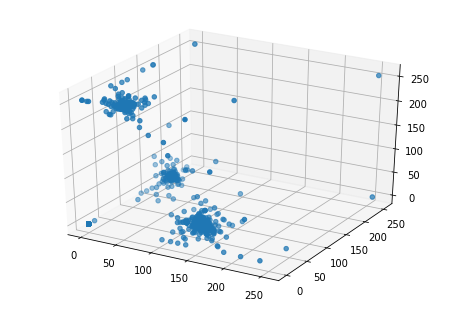

In [3]:
img = image('test/fanta.png')
r, g, b = img.get_rbg()
r = r.flatten()
b = b.flatten()
g = g.flatten()
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

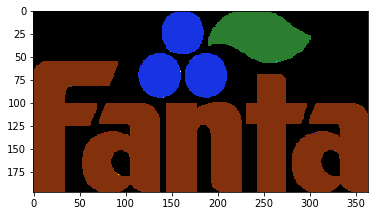

In [4]:
img.img_show()

In [5]:
img.kmeans(5)

array([[ 1.30298040e+01,  4.79753947e+01,  1.30951855e+02],
       [-8.55493454e-12,  4.17818343e-04,  4.99582598e-11],
       [ 2.26085961e+02,  5.20604354e+01,  2.40745120e+01],
       [ 4.79508617e+01,  1.25009548e+02,  4.29441081e+01],
       [ 8.50000000e+01,  2.55000000e+02,  2.55000000e+02]])

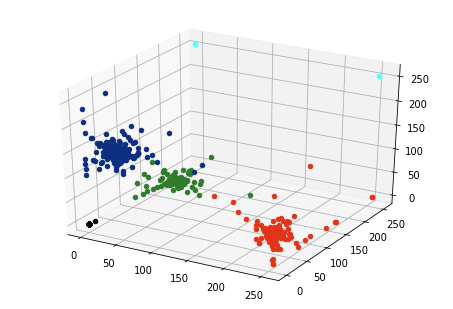

In [6]:
fig = plt.figure()
ax = Axes3D(fig)        
for label, pix in zip(img.labels, img.img_arr):
    ax.scatter(pix[0], pix[1], pix[2], color = img.rgb_to_hex(img.centers[label]))
plt.show()